# Exploratory Data Analysis

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle
import os
import numpy as np

In [55]:
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()

### Exploración y limpieza de datos

In [56]:
url_data = os.path.join(current_dir, "../data/raw/Dataframe_Final_Data.csv")
data = pd.read_csv(url_data, sep = ',')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


#### Verificamos el tamaño

In [57]:
# Obtener las dimensiones.
data.shape

(10015560, 32)

#### Comprobamos que solo hay tres estados 

In [5]:
data.state_id.unique()

array(['CA', 'TX', 'WI'], dtype=object)

#### Comprobamos las tiendas que hay representadas

In [6]:
data.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

#### Obtenemos informacion general

In [7]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015560 entries, 0 to 10015559
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   item_id             object 
 2   dept_id             object 
 3   cat_id              object 
 4   store_id            object 
 5   state_id            object 
 6   d                   object 
 7   sales               int64  
 8   date                object 
 9   wm_yr_wk            int64  
 10  weekday             object 
 11  wday                int64  
 12  month               object 
 13  year                int64  
 14  event_name_1        object 
 15  event_type_1        object 
 16  event_name_2        object 
 17  event_type_2        object 
 18  snap_CA             int64  
 19  snap_TX             int64  
 20  snap_WI             int64  
 21  sell_price          float64
 22  day_of_week         int64  
 23  is_weekend          int64  
 24  quarter             in

#### Verificar duplicados

In [8]:
# Verificar si hay duplicados.
data.duplicated().sum()

np.int64(0)

En este caso no encontramos duplicados en el conjunto de datos.

#### Eliminar columnas sin relevancia

In [9]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


In [58]:
data_limpia = data.drop(columns = ['id', 'wm_yr_wk', 'weekday', 'day_of_week', 'month', 'quarter'])


print(data_limpia.columns)

data_limpia.head()

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales',
       'date', 'wday', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price',
       'is_weekend', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')


,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wday,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


#### Columnas que DESCARTAR y por qué:

`wm_yr_wk`: Puede derivarse de date.

`weekday`: Redundante con date (puedes extraer el día de la semana).

`day_of_week`: Redundante con weekday y wday.

`quarter`: Derivable de month.

#### Columnas que son de utilidad pero que hay que MODIFICAR:

`date`: En su forma cruda no son útiles, pero podemos extraer de ellas variables como: Día de la semana Mes ¿Es fin de semana o no? ¿Es feriado o no?
Entonces: descartarlas como strings, pero sacar variables derivadas antes.

`dept_id`, `cat_id`, `store_id`, `state_id`: Factorizarlas

#### Columnas ÚTILES para predecir la demanda:

`item_id`: Identificador clave del producto.

`sales`: Variable objetivo, la demanda que se quiere predecir.

`date`: Necesaria para extraer características temporales.

`store_id`: Información relevante del punto de venta.

`state_id`: Información geográfica que podría influir en la demanda.

`sell_price`: Precio de venta, importante para la demanda.

`scaled_sell_price`: Versión escalada de sell_price, útil si se normaliza la entrada.

`pi_mean`: Indicador económico relevante para la demanda.

`poblacion`: Influye en la demanda dependiendo del tamaño de la población.

`Crecimiento_p`: Crecimiento poblacional, que puede afectar la demanda.

`pib_por_estado`: Indicador económico importante.

`riqueza_per_capita`: Impacta el poder adquisitivo y la demanda.

`wti`: Relacionado con los precios del petróleo, puede afectar la demanda.



### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

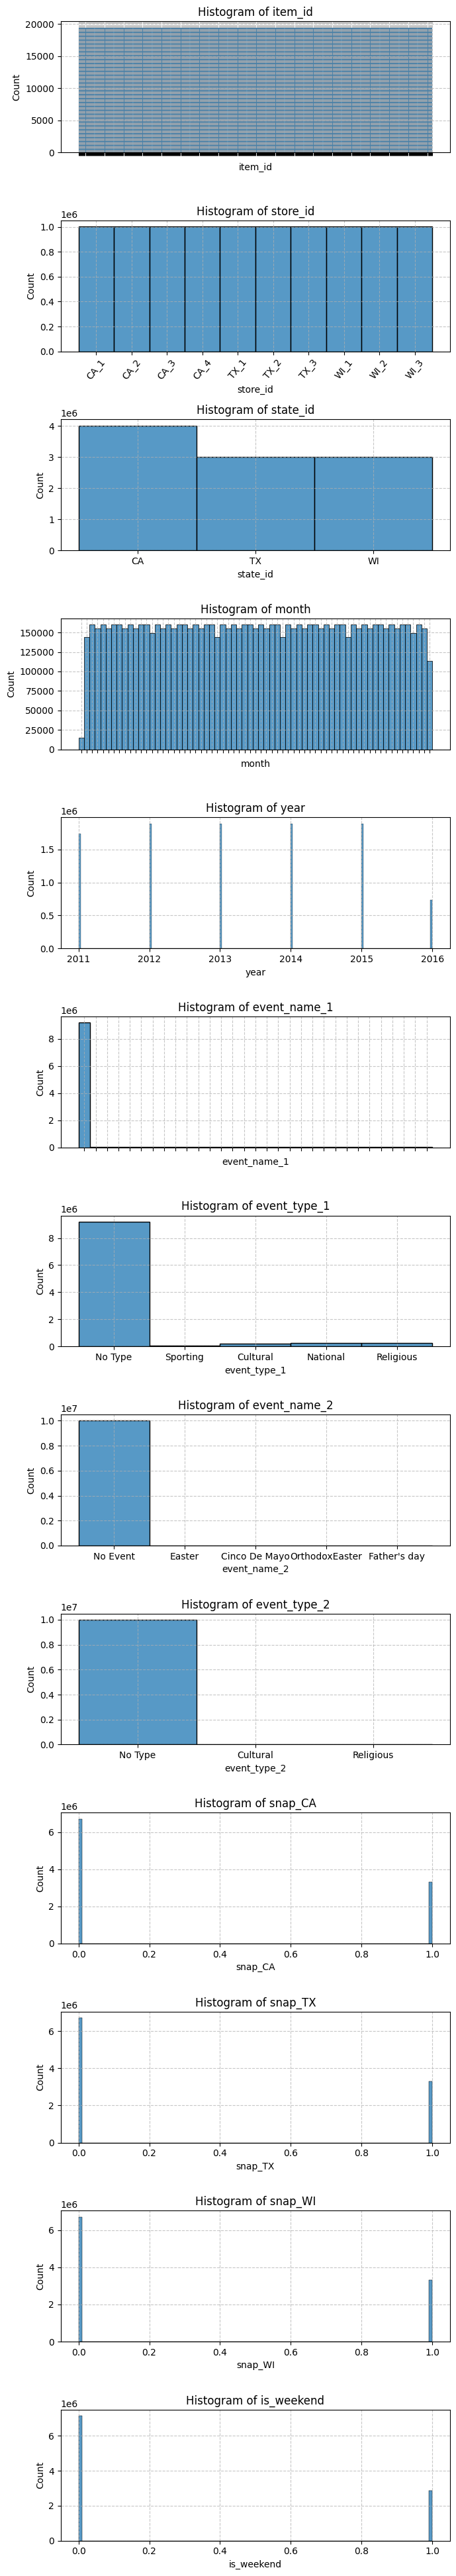

In [12]:
categoricals_variables = ['item_id', 'store_id', 'state_id', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX',
       'snap_WI', 'is_weekend']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

#### Análisis sobre variables numéricas

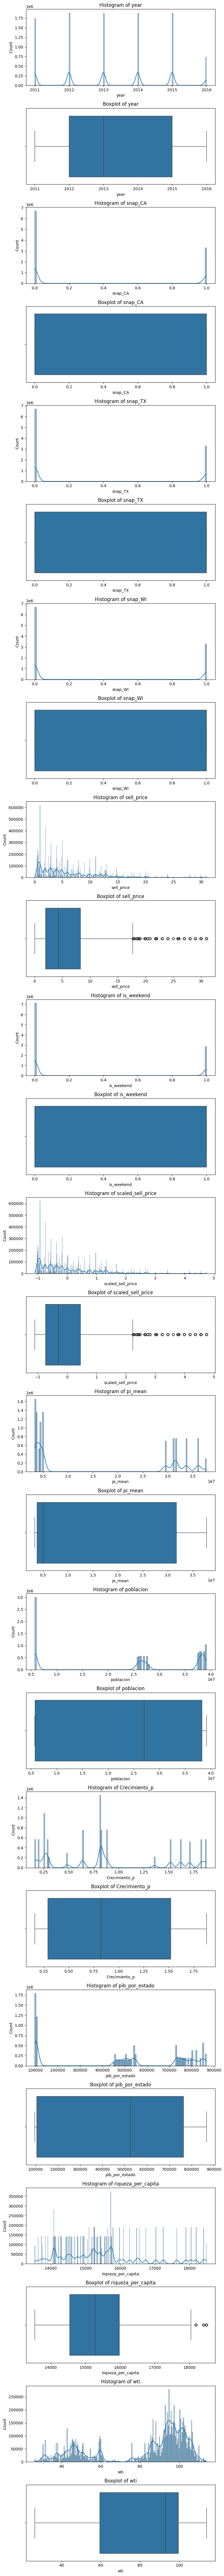

In [13]:
numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['sales']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        # Rango para el histograma y el boxplot de columna1...
        
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

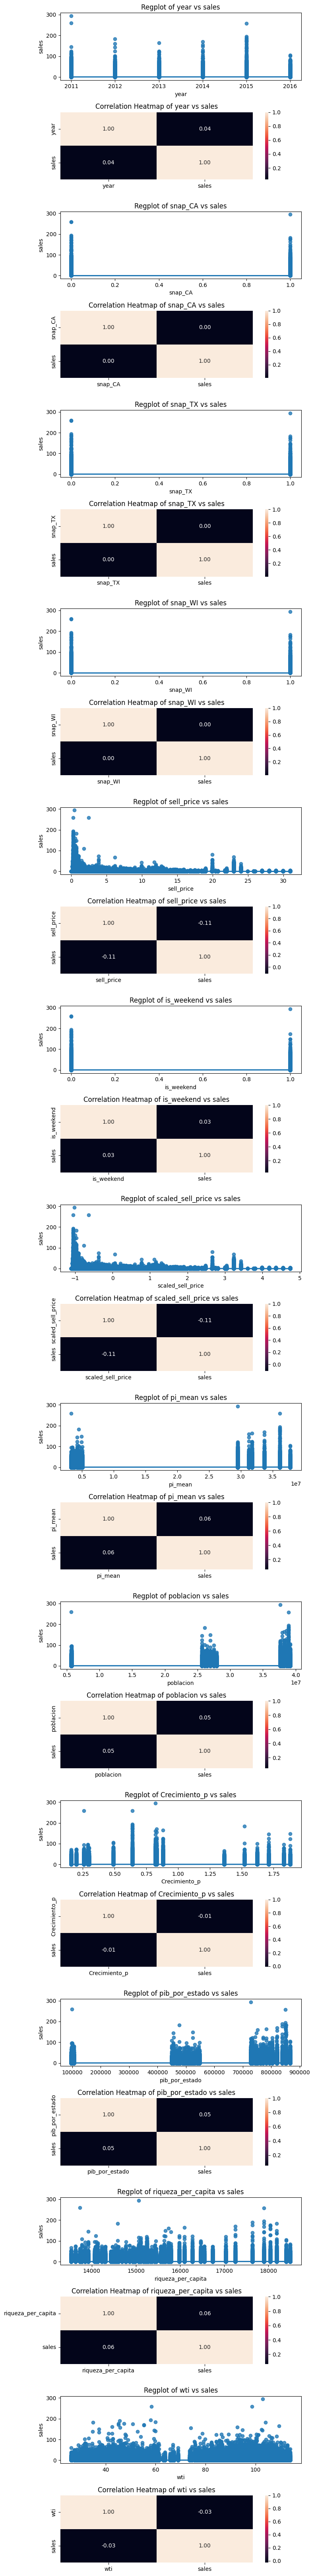

,item_id,store_id,state_id,d,sales,date,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001,CA_1,CA,d_1,0,2011-01-29,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002,CA_1,CA,d_1,0,2011-01-29,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003,CA_1,CA,d_1,0,2011-01-29,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004,CA_1,CA,d_1,0,2011-01-29,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005,CA_1,CA,d_1,0,2011-01-29,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


In [14]:

numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['sales']).columns.tolist() # Con esta linea seleccionamos las columnas numericas del dataframe.

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'sales' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

data_limpia.head()

**Análisis de posibles relaciones entre variables numericas**

In [ ]:
sns.regplot(data = data_limpia, x = "poblacion", y = "pi_mean")
sns.heatmap(data_limpia[["poblacion", "pi_mean"]].corr(), annot = True, fmt = ".2f", cbar = False)

In [ ]:
sns.regplot(data = data_limpia, x = "pib_por_estado", y = "riqueza_per_capita")
sns.heatmap(data_limpia[["pib_por_estado", "riqueza_per_capita"]].corr(), annot = True, fmt = ".2f", cbar = False)

NameError: name 'axis' is not defined

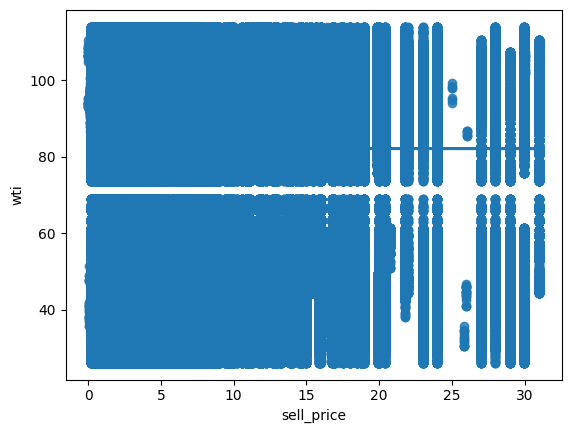

In [15]:
sns.regplot(data = data_limpia, x = "sell_price", y = "wti")
sns.heatmap(data_limpia[["sell_price", "wti"]].corr(), annot = True, fmt = ".2f", cbar = False)

#### Combinaciones de la clase con varias predictoras

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sales', y='store_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sell_price', y='item_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sell_price', y='state_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sales', y='month')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

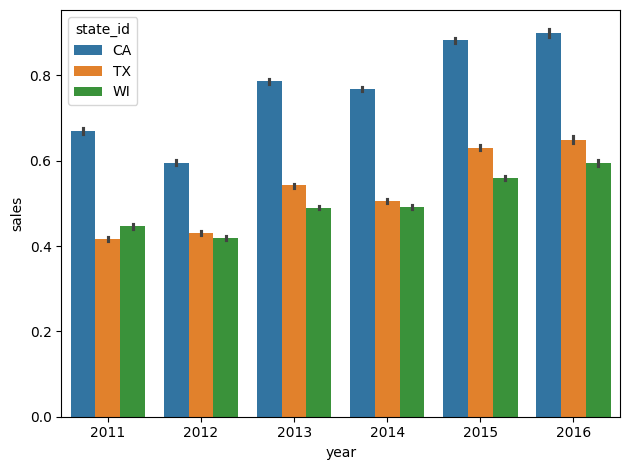

In [17]:
sns.barplot(data = data_limpia, x = "year", y = 'sales', hue = 'state_id')

plt.tight_layout()
plt.show()

#### Factorización

In [59]:

data_limpia["dept_id_n"] = pd.factorize(data_limpia["dept_id"])[0]
data_limpia["cat_id_n"] = pd.factorize(data_limpia["cat_id"])[0]
data_limpia["store_id_n"] = pd.factorize(data_limpia["store_id"])[0]
data_limpia["state_id_n"] = pd.factorize(data_limpia["state_id"])[0]
data_limpia["item_id_n"] = pd.factorize(data_limpia["item_id"])[0]
data_limpia["event_name_1_n"] = pd.factorize(data_limpia["event_name_1"])[0]
data_limpia["event_type_1_n"] = pd.factorize(data_limpia["event_type_1"])[0]
data_limpia["event_name_2_n"] = pd.factorize(data_limpia["event_name_2"])[0]
data_limpia["event_type_2_n"] = pd.factorize(data_limpia["event_type_2"])[0]

dept_id_transformation_rules = {row["dept_id"]: row["dept_id_n"] for _, row in data_limpia[["dept_id", "dept_id_n"]].drop_duplicates().iterrows()}
cat_id_transformation_rules = {row["cat_id"]: row["cat_id_n"] for _, row in data_limpia[["cat_id", "cat_id_n"]].drop_duplicates().iterrows()}
state_id_transformation_rules = {row["state_id"]: row["state_id_n"] for _, row in data_limpia[["state_id", "state_id_n"]].drop_duplicates().iterrows()}
item_id_transformation_rules = {row["item_id"]: row["item_id_n"] for _, row in data_limpia[["item_id", "item_id_n"]].drop_duplicates().iterrows()}
store_id_transformation_rules = {row["store_id"]: row["store_id_n"] for _, row in data_limpia[["store_id", "store_id_n"]].drop_duplicates().iterrows()}
event_name_1_transformation_rules = {row["event_name_1"]: row["event_name_1_n"] for _, row in data_limpia[["event_name_1", "event_name_1_n"]].drop_duplicates().iterrows()}
event_type_1_transformation_rules = {row["event_type_1"]: row["event_type_1_n"] for _, row in data_limpia[["event_type_1", "event_type_1_n"]].drop_duplicates().iterrows()}
event_name_2_transformation_rules = {row["event_name_2"]: row["event_name_2_n"] for _, row in data_limpia[["event_name_2", "event_name_2_n"]].drop_duplicates().iterrows()}
event_type_2_transformation_rules = {row["event_type_2"]: row["event_type_2_n"] for _, row in data_limpia[["event_type_2", "event_type_2_n"]].drop_duplicates().iterrows()}

# for k, v in IsAllergic_transformation_rules.items():
#     print(f"Key: {k} (type: {type(k)}), Value: {v} (type: {type(v)})")
#     break  # eliminá este break si querés verlos todos



transformation_rules_path = os.path.join(current_dir, '../data/jsons/transformation_rules.json')

def convertir_dict(dic):
    return {str(k): int(v) if isinstance(v, (np.integer, bool)) else v for k, v in dic.items()}

transformation_rules = {
    "dept_id_rules": convertir_dict(dept_id_transformation_rules),
    "cat_id_rules": convertir_dict(cat_id_transformation_rules),
    "state_id_rules": convertir_dict(state_id_transformation_rules),
    "item_id_rules": convertir_dict(item_id_transformation_rules),
    "store_id_rules": convertir_dict(store_id_transformation_rules),
    "event_name_1_rules": convertir_dict(event_name_1_transformation_rules),
    "event_type_1_rules": convertir_dict(event_type_1_transformation_rules),
    "event_name_2_rules": convertir_dict(event_name_2_transformation_rules),
    "event_type_2_rules": convertir_dict(event_type_2_transformation_rules)
}


with open(transformation_rules_path, "w") as f:
  json.dump(transformation_rules, f)


##### Análisis de correlaciones. 

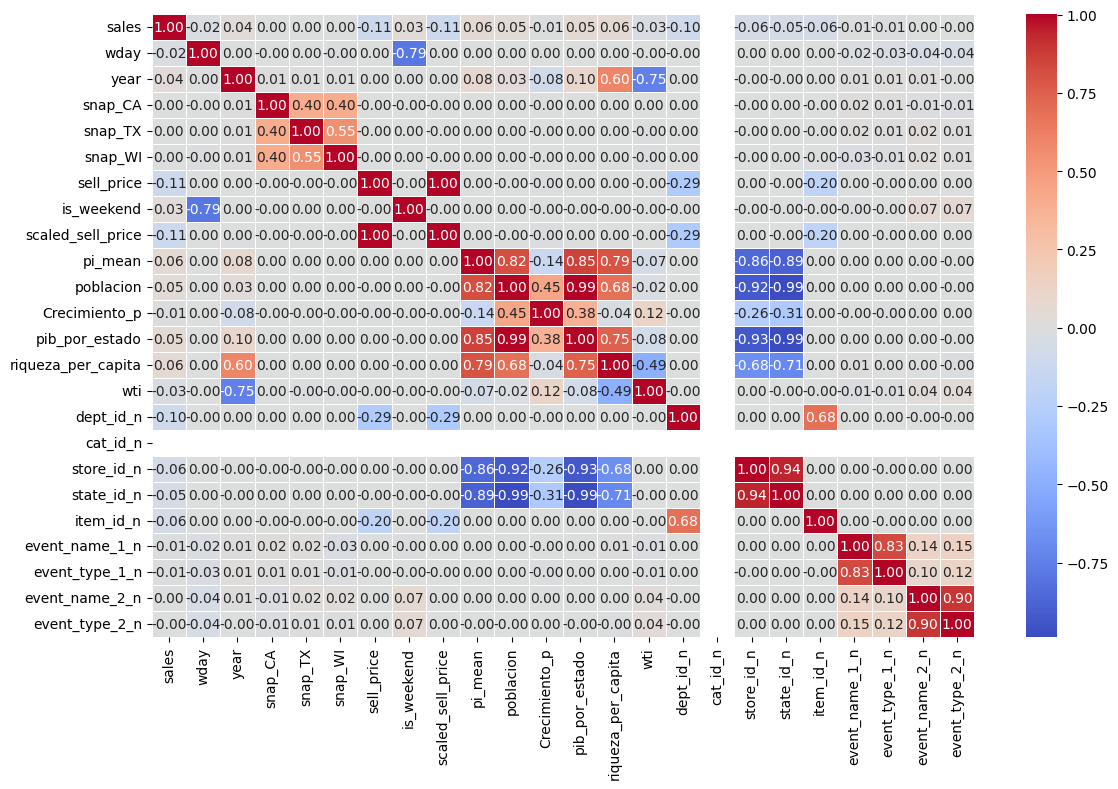

In [28]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

#### Pairpolot

In [ ]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [29]:
data_limpia.describe()

,sales,wday,year,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n
count,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,10015560.0,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07,1.001556e+07
mean,6.034696e-01,3.997424e+00,2.013249e+03,3.297269e-01,3.297269e-01,3.297269e-01,5.850806e+00,2.864503e-01,-6.091455e-17,1.564780e+07,2.505348e+07,8.873550e-01,4.984518e+05,1.546273e+04,8.216792e+01,1.937984e-01,0.0,4.500000e+00,9.000000e-01,2.575000e+02,1.214838e+00,2.364760e-01,5.151984e-03,2.575992e-03
std,2.110930e+00,2.000642e+00,1.556974e+00,4.701139e-01,4.701139e-01,4.701139e-01,5.295873e+00,4.521024e-01,1.000000e+00,1.420423e+07,1.355078e+07,5.796565e-01,2.875065e+05,1.225436e+03,2.362961e+01,3.952729e-01,0.0,2.872281e+00,8.306624e-01,1.489561e+02,4.789619e+00,8.427212e-01,1.242152e-01,5.999794e-02
min,0.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,-1.102898e+00,3.330011e+06,5.705288e+06,1.600000e-01,9.679190e+04,1.353667e+04,2.621000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.970000e+00,0.000000e+00,-7.327983e-01,3.777543e+06,5.760940e+06,2.900000e-01,1.053198e+05,1.453933e+04,5.937200e+01,0.000000e+00,0.0,2.000000e+00,0.000000e+00,1.287500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,4.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.240000e+00,0.000000e+00,-3.041626e-01,4.951337e+06,2.696433e+07,8.200000e-01,5.249148e+05,1.527700e+04,9.303429e+01,0.000000e+00,0.0,4.500000e+00,1.000000e+00,2.575000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,8.260000e+00,1.000000e+00,4.549192e-01,3.173940e+07,3.826079e+07,1.520000e+00,7.638917e+05,1.597633e+04,9.960000e+01,0.000000e+00,0.0,7.000000e+00,2.000000e+00,3.862500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.940000e+02,7.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.098000e+01,1.000000e+00,4.745053e+00,3.777824e+07,3.916712e+07,1.880000e+00,8.668697e+05,1.849100e+04,1.139300e+02,1.000000e+00,0.0,9.000000e+00,2.000000e+00,5.150000e+02,3.000000e+01,4.000000e+00,4.000000e+00,2.000000e+00


#### Boxplots para visualizar los outliers

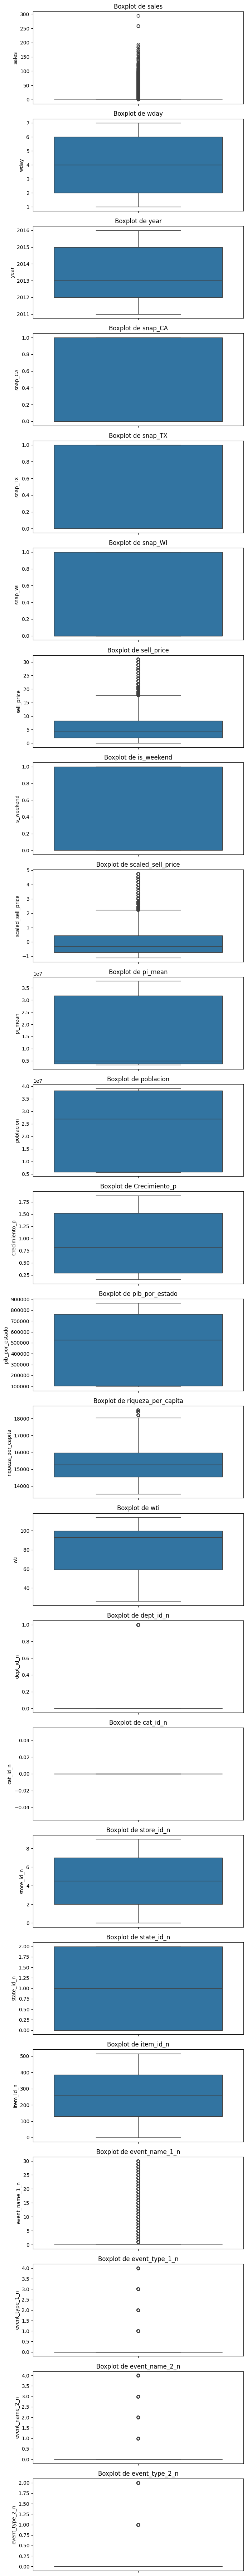

In [47]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)

#### Inferencia de nuevas características

In [60]:
# Asegurarse de que la columna Date es datetime
data_limpia['date'] = pd.to_datetime(data_limpia['date'])

data_limpia['month'] = data_limpia['date'].dt.month
data_limpia['day'] = data_limpia['date'].dt.day

data_limpia.head()

,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wday,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n,month,day
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,0,0,0,0,0,1,29
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,1,0,0,0,0,1,29
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,2,0,0,0,0,1,29
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,3,0,0,0,0,1,29
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,4,0,0,0,0,1,29


#### Separación del Dataset en uno con outliers y otro sin outliers

In [61]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['riqueza_per_capita']: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

outliers_replacement_path = os.path.join(current_dir, '../data/jsons/outliers_replacement.json')

with open(outliers_replacement_path, "w") as f:
    json.dump(outliers_dict, f)

#### Escalado de valores

In [ ]:
num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['sales'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# Asegurarse de que la columna Date es datetime
data_limpia_con_outliers['date'] = pd.to_datetime(data_limpia_con_outliers['date'])
data_limpia_sin_outliers['date'] = pd.to_datetime(data_limpia_sin_outliers['date'])

# Ordenar por fecha (por si acaso)
data_limpia_con_outliers = data_limpia_con_outliers.sort_values('date')
data_limpia_sin_outliers = data_limpia_sin_outliers.sort_values('date')

# Definir fecha de corte para los últimos 15 días
fecha_corte = data_limpia_con_outliers['date'].max() - pd.Timedelta(days=365)

# Split CON outliers
train_con_outliers = data_limpia_con_outliers[data_limpia_con_outliers['date'] <= fecha_corte]
test_con_outliers = data_limpia_con_outliers[data_limpia_con_outliers['date'] > fecha_corte]

# Split SIN outliers
train_sin_outliers = data_limpia_sin_outliers[data_limpia_sin_outliers['date'] <= fecha_corte]
test_sin_outliers = data_limpia_sin_outliers[data_limpia_sin_outliers['date'] > fecha_corte]

# Separar variables X e y (Quantity)
X_train_con_outliers = train_con_outliers.drop(columns=['sales', 'date'])[num_variables]
y_train = train_con_outliers['sales']
X_test_con_outliers = test_con_outliers.drop(columns=['sales', 'date'])[num_variables]
y_test = test_con_outliers['sales']

X_train_sin_outliers = train_sin_outliers.drop(columns=['sales', 'date'])[num_variables]
X_test_sin_outliers = test_sin_outliers.drop(columns=['sales', 'date'])[num_variables]

# GUARDAR LOS DATASETS

X_train_con_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_train_con_outliers.csv'), index = False)
X_train_sin_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_train_sin_outliers.csv'), index = False)
X_test_con_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_test_con_outliers.csv'), index = False)
X_test_sin_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_test_sin_outliers.csv'), index = False)
y_train.to_csv(os.path.join(current_dir,'../data/csv_model/y_train.csv'), index = False)
y_test.to_csv(os.path.join(current_dir,'../data/csv_model/y_test.csv'), index = False)

X_train_con_outliers.head()

,wday,year,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n,month,day
0,1,2011,0,0,0,9.58,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,0,0,0,0,0,1,29
3443,1,2011,0,0,0,5.24,1,-0.115336,4.231724e+06,25645629.0,1.71,449661.800000,13775.0,92.19,0,0,6,1,347,0,0,0,0,1,29
3442,1,2011,0,0,0,3.67,1,-0.411794,4.231724e+06,25645629.0,1.71,449661.800000,13775.0,92.19,0,0,6,1,346,0,0,0,0,1,29
3441,1,2011,0,0,0,23.98,1,3.423269,4.231724e+06,25645629.0,1.71,449661.800000,13775.0,92.19,0,0,6,1,345,0,0,0,0,1,29
3440,1,2011,0,0,0,0.98,1,-0.919736,4.231724e+06,25645629.0,1.71,449661.800000,13775.0,92.19,0,0,6,1,344,0,0,0,0,1,29


: 